In [13]:
import matplotlib.pyplot as plt
import numpy as np
import mcmc

In [16]:
# starting position of (a_0,a_1,a_2)
startpos = np.array([0,0,0])
# starting random draws of systematic parameters
startsyst = np.random.rand(6)
# Covariance matrix of proposal dist. of (a_0,a_1,a_2)
# Proposal is centered at current position
# For no covariance between the three parameters, make off-diagonal elements zero
proposal_cov = np.array([[0.075,-0.1,-0.2],[-0.1,1.5,-2.0],[-0.2,-2.0,30]])
# input TPC simulation file name
# assumed to be in ./data/ with suffix .csv
fname_overlay = 'qeselectedevents_prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
# input dirt simulation file name
# assumed to be in ./data/ with suffix .csv
fname_dirt = 'qeselectedevents_prodgenie_bnb_dirt_nu_cosmic_uboone_mcc8_reco_limit_4000'
# output file name
# all chains (including systematics) are written to this file at the end of every batch
fname_output = 'samples_500.out'
# total number of MCMC steps
# This number should be much higher than 5000 (ex: 200,000 used in thesis)
num_iterations = 5000
# number of steps per batch
# acceptance rate is shown and chains are writtin to file after every batch
batch_size = 1000

In [17]:
a0,a1,a2,syst,lk,na = mcmc.run_mcmc(fname_overlay,fname_dirt,fname_output,startpos,startsyst,proposal_cov,num_iterations,batch_size);

Running mcmc
Number of chunks: 6
This chunk: 657.205635071 s
Naccept: 1084, percent: 0.542
This chunk: 660.875201941 s
Naccept: 2182, percent: 0.5455
This chunk: 722.092227221 s
Naccept: 3270, percent: 0.545
This chunk: 650.296984911 s
Naccept: 4375, percent: 0.546875
This chunk: 660.563604116 s
Naccept: 5472, percent: 0.5472


Text(0.5,0,'Samples')

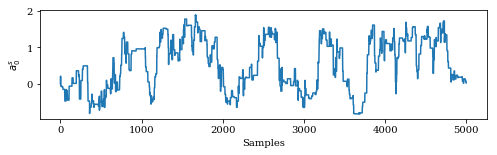

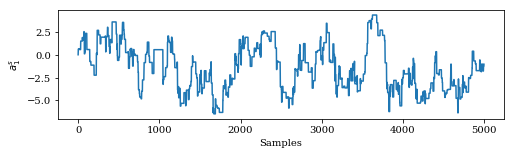

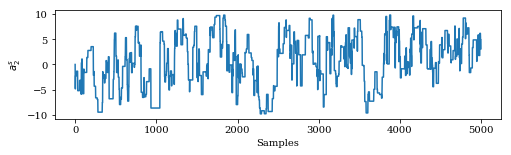

In [18]:
# look at a_0,a_1,a_2 chains
plt.figure(figsize=(8,2))
plt.plot(a0)
plt.ylabel('$a_0^s$')
plt.xlabel('Samples')

plt.figure(figsize=(8,2))
plt.plot(a1)
plt.ylabel('$a_1^s$')
plt.xlabel('Samples')

plt.figure(figsize=(8,2))
plt.plot(a2)
plt.ylabel('$a_2^s$')
plt.xlabel('Samples')

In [38]:
# get rid of the first 100 samples for "burn-in"
a0 = a0[100:]
a1 = a1[100:]
a2 = a2[100:]

Text(0.5,0,'$a_2^s$')

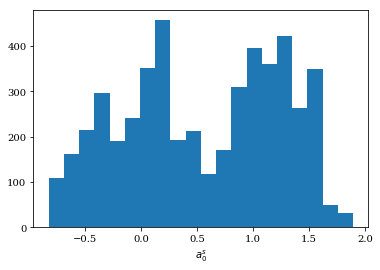

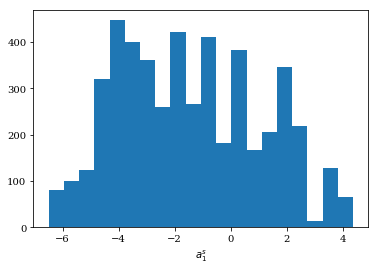

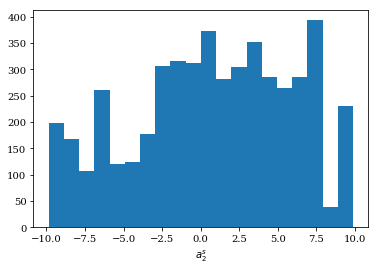

In [44]:
# look at a_0,a_1,a_2 posterior distributions
plt.figure()
plt.hist(a0,bins=20);
plt.xlabel('$a_0^s$')

plt.figure()
plt.hist(a1,bins=20);
plt.xlabel('$a_1^s$')

plt.figure()
plt.hist(a2,bins=20);
plt.xlabel('$a_2^s$')

In [45]:
# convert to delta s and MA s
a3 = -20.*a0 - 10.*a1 - 4.*a2
a4 = 45*a0 + 20.*a1 + 6.*a2
a5 = -36.*a0 - 15.*a1 - 4.*a2
a6 = 10.*a0 + 4.*a1 + a2

t_cut = 9.*0.13957**2
t0  = -0.28
z0  = (np.sqrt(t_cut) - np.sqrt(t_cut-t0))/(np.sqrt(t_cut) + np.sqrt(t_cut - t0))

GaS = a0 + a1*z0 + a2*z0**2 + a3*z0**3 + a4*z0**4 + a5*z0**5 + a6*z0**6
MAs = np.sqrt(np.abs(2.*GaS/(a1 + 2.*a2*z0 + 3.*a3*z0**2 + 4.*a4*z0**3 + 5.*a5*z0**4 + 6.*a6*z0**5)))

Text(0,0.5,'$\\Delta s$')

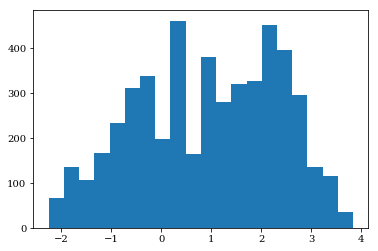

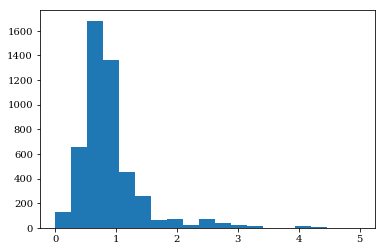

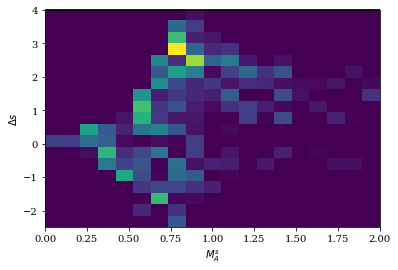

In [49]:
# look at delta-s and MAs posterior distributions
plt.figure()
plt.hist(GaS,bins=20);

plt.figure()
plt.hist(MAs,bins=np.linspace(0,5,20));

plt.figure()
plt.hist2d(MAs,GaS,bins=(np.linspace(0,2,20),np.linspace(-2.5,4,20)));
plt.xlabel('$M_A^s$')
plt.ylabel('$\Delta s$')